<a href="https://colab.research.google.com/github/XavierCarrera/machine-learning/blob/master/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

In [3]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [4]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car
horse
horse
bird


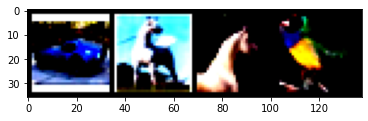

In [5]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [7]:
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [8]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [9]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.Tanh(),
            nn.Linear(512, 2))

In [10]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

In [11]:
x = torch.tensor([1.0, 2.0, 3.0])

sigmoid(x)

tensor([0.7311, 0.8808, 0.9526])

In [12]:
sigmoid(x).sum()

tensor(2.5644)

In [13]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [15]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [16]:
softmax(x).sum()

tensor(1.)

In [17]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [18]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

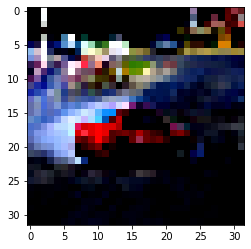

In [19]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [20]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4060, 0.5940]], grad_fn=<SoftmaxBackward>)

In [21]:
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

-> car  model: cat


# Connected Classifier

In [22]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

In [23]:
img, label = data_set[20]

out = model(img.view(-1).unsqueeze(0))

_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

loss(out, torch.tensor([label]))

-> car  model: car


tensor(0.5964, grad_fn=<NllLossBackward>)

In [24]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [25]:
learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

lossFunction = nn.NLLLoss()

n_epochs = 5 #100

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = lossFunction(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.000217
Epoch: 1, Loss: 0.957573
Epoch: 2, Loss: 0.090461
Epoch: 3, Loss: 0.002655
Epoch: 4, Loss: 0.570822


In [26]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))


optimizer = optim.SGD(model.parameters(), lr=0.02)

loss_function = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.430275
Epoch: 1, Loss: 0.688822
Epoch: 2, Loss: 0.326662
Epoch: 3, Loss: 0.270212
Epoch: 4, Loss: 0.408630
Epoch: 5, Loss: 0.250243
Epoch: 6, Loss: 0.658389
Epoch: 7, Loss: 0.157436
Epoch: 8, Loss: 0.070986
Epoch: 9, Loss: 0.338247
Epoch: 10, Loss: 0.193364
Epoch: 11, Loss: 0.207603
Epoch: 12, Loss: 0.558861
Epoch: 13, Loss: 0.120080
Epoch: 14, Loss: 0.236612
Epoch: 15, Loss: 0.106038
Epoch: 16, Loss: 0.116046
Epoch: 17, Loss: 0.046933
Epoch: 18, Loss: 0.164320
Epoch: 19, Loss: 0.037176
Epoch: 20, Loss: 0.125306
Epoch: 21, Loss: 0.039985
Epoch: 22, Loss: 0.193496
Epoch: 23, Loss: 0.040337
Epoch: 24, Loss: 0.196122
Epoch: 25, Loss: 0.091004
Epoch: 26, Loss: 0.029685
Epoch: 27, Loss: 0.013391
Epoch: 28, Loss: 0.027721
Epoch: 29, Loss: 0.026484
Epoch: 30, Loss: 0.042574
Epoch: 31, Loss: 0.023297
Epoch: 32, Loss: 0.014925
Epoch: 33, Loss: 0.026350
Epoch: 34, Loss: 0.008339
Epoch: 35, Loss: 0.011880
Epoch: 36, Loss: 0.017042
Epoch: 37, Loss: 0.011517
Epoch: 38, Loss: 0.022

In [27]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.861500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  car  model: car


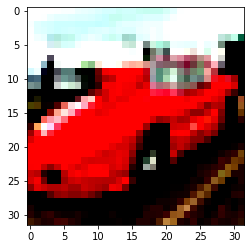

In [28]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [29]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.407647
Epoch: 1, Loss: 0.571862
Epoch: 2, Loss: 0.492612
Epoch: 3, Loss: 0.268718
Epoch: 4, Loss: 0.146633
Epoch: 5, Loss: 0.301270
Epoch: 6, Loss: 0.296401
Epoch: 7, Loss: 0.665238
Epoch: 8, Loss: 0.508077
Epoch: 9, Loss: 0.342795
Epoch: 10, Loss: 0.439208
Epoch: 11, Loss: 0.463515
Epoch: 12, Loss: 0.140954
Epoch: 13, Loss: 0.223653
Epoch: 14, Loss: 0.108889
Epoch: 15, Loss: 0.082902
Epoch: 16, Loss: 0.074982
Epoch: 17, Loss: 0.132626
Epoch: 18, Loss: 0.169252
Epoch: 19, Loss: 0.242822
Epoch: 20, Loss: 0.187117
Epoch: 21, Loss: 0.242530
Epoch: 22, Loss: 0.168156
Epoch: 23, Loss: 0.141483
Epoch: 24, Loss: 0.158546
Epoch: 25, Loss: 0.066947
Epoch: 26, Loss: 0.222302
Epoch: 27, Loss: 0.149862
Epoch: 28, Loss: 0.026774
Epoch: 29, Loss: 0.070960
Epoch: 30, Loss: 0.104735
Epoch: 31, Loss: 0.133245
Epoch: 32, Loss: 0.072946
Epoch: 33, Loss: 0.079102
Epoch: 34, Loss: 0.004462
Epoch: 35, Loss: 0.039775
Epoch: 36, Loss: 0.007121
Epoch: 37, Loss: 0.063589
Epoch: 38, Loss: 0.032

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

In [ ]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('correct: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))

In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

In [ ]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

In [ ]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

In [ ]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

In [ ]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))